# Performing ISOLATION FOREST :

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset
data = pd.read_csv('/content/@1.csv')

# Select all numerical columns for training
numerical_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
    'z_score', 'Service Utilization Rate', 'Average Cost per Service',
    'Payment to Charge Ratio', 'Total Services'
]

# Extract the numerical data and drop rows with missing values
numerical_data = data[numerical_columns].dropna()

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(numerical_data)

# Predict anomalies
numerical_data['anomaly'] = iso_forest.predict(numerical_data)

# Replace anomaly values with meaningful labels
numerical_data['anomaly'] = numerical_data['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Merge the anomaly labels back to the original data
data['anomaly'] = numerical_data['anomaly']


## 1.PLOT

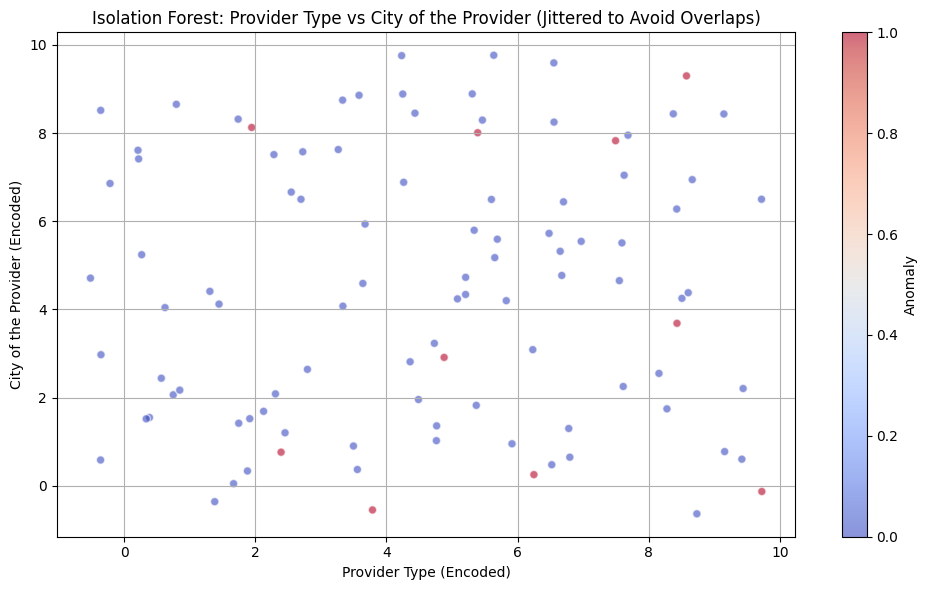

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
data = {
    'Provider Type Encoded': np.random.randint(0, 10, 100),
    'City of the Provider Encoded': np.random.randint(0, 10, 100),
    'Anomaly': np.random.rand(100) > 0.9  # Example anomaly data
}

# Using a significant jitter to avoid overlaps
jitter_strength = 0.8

# Add jitter to the encoded data
data['Provider Type Encoded Jittered'] = data['Provider Type Encoded'] + np.random.uniform(-jitter_strength, jitter_strength, size=data['Provider Type Encoded'].shape)
data['City of the Provider Encoded Jittered'] = data['City of the Provider Encoded'] + np.random.uniform(-jitter_strength, jitter_strength, size=data['City of the Provider Encoded'].shape)

# Plotting the results with jitter to avoid overlaps
plt.figure(figsize=(10, 6))

# Scatter plot with jittered data and anomaly detection
plt.scatter(data['Provider Type Encoded Jittered'], data['City of the Provider Encoded Jittered'], c=data['Anomaly'], cmap='coolwarm', alpha=0.6, edgecolors='w')  # Adding edgecolors='w' to add white edges to points
plt.title('Isolation Forest: Provider Type vs City of the Provider (Jittered to Avoid Overlaps)')
plt.xlabel('Provider Type (Encoded)')
plt.ylabel('City of the Provider (Encoded)')
plt.colorbar(label='Anomaly')
plt.grid(True)  # Optionally, add grid lines
plt.tight_layout()  # Optionally, improve spacing
plt.show()




*This is the Scatter plot by Isolation forest between the categorical columns "Provider Type vs City of the Provider".

*Red points indicates rhe anomalies  while blue points are normal.



# 2.PLOT

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


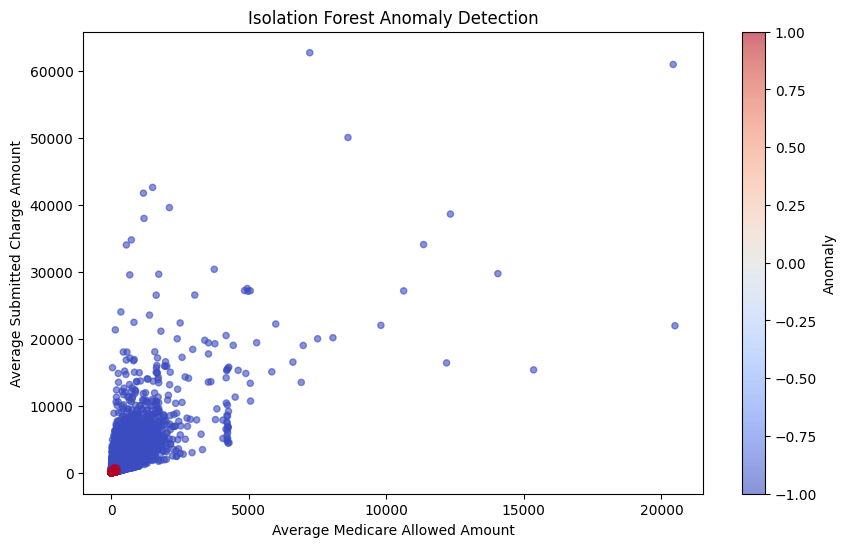

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data (replace 'Healthcare Providers.csv' with your actual file path)
df = pd.read_csv('/content/Healthcare Providers.csv', encoding='ascii')

# Select the two numerical columns
numerical_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']
data = df[numerical_columns]

# Remove commas and convert to numeric
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle any missing values by dropping them
data = data.dropna()

# Fit the Isolation Forest model and get predictions for the preprocessed data
iso_forest = IsolationForest(contamination=0.1)
anomalies = iso_forest.fit_predict(data)

# Create a new DataFrame from the preprocessed data and add the anomaly column
df_anomalies = pd.DataFrame(data)
df_anomalies['anomaly'] = anomalies # Assign the anomalies to the new DataFrame

# Visualize the results using scatter plots
plt.figure(figsize=(10, 6))
# Use df_anomalies for plotting to ensure consistency
plt.scatter(df_anomalies['Average Medicare Allowed Amount'], df_anomalies['Average Submitted Charge Amount'],
            c=df_anomalies['anomaly'], cmap='coolwarm', s=20, alpha=0.6)
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.title('Isolation Forest Anomaly Detection')
plt.colorbar(label='Anomaly')
plt.show()




* This plot is between Average Medicare Allowed Amount and Average Submitted Charge Amount
* we can clearly see the anomaly points are in few quantity and are present at bottom of the graph .



# 3.PLOT

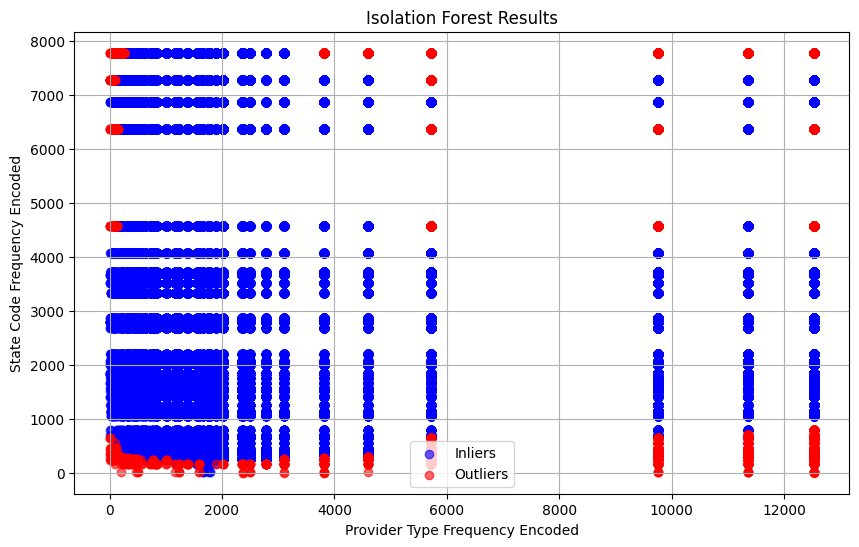

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Healthcare Providers.csv'
data = pd.read_csv(file_path)

# Select the categorical columns for frequency encoding
categorical_columns = ['Provider Type', 'State Code of the Provider']

# Perform frequency encoding
for col in categorical_columns:
    freq_encoding = data[col].value_counts().to_dict()
    data[col + '_freq_encoded'] = data[col].map(freq_encoding)

# Select the encoded columns
columns_to_use = ['Provider Type_freq_encoded', 'State Code of the Provider_freq_encoded']
data_filtered = data[columns_to_use].dropna()

# Scale the data (optional step, depending on the distribution of your data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_filtered_scaled = scaler.fit_transform(data_filtered)

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination
data_filtered['anomaly'] = iso_forest.fit_predict(data_filtered_scaled)

# Extract inliers and outliers
inliers = data_filtered[data_filtered['anomaly'] == 1]
outliers = data_filtered[data_filtered['anomaly'] == -1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(inliers['Provider Type_freq_encoded'], inliers['State Code of the Provider_freq_encoded'],
            color='blue', label='Inliers', alpha=0.6)
plt.scatter(outliers['Provider Type_freq_encoded'], outliers['State Code of the Provider_freq_encoded'],
            color='red', label='Outliers', alpha=0.6)
plt.xlabel('Provider Type Frequency Encoded')
plt.ylabel('State Code Frequency Encoded')
plt.title('Isolation Forest Results')
plt.legend()
plt.grid(True)
plt.show()




* This is the another plot of categorical columns between provider type and state code

* Normal points(blue) data points are densely packed and spread across the entire range of x-axis .
* Outliers (red) data points are more sparsely scattered throughout the plot.


*  



# PERFORMING ELLIPTIC ENVELOPE :

In [ ]:
#  training the Elliptic Envelope on all numerical columns to capture overall outliers

# Select all numerical columns for training
numerical_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
    'z_score', 'Service Utilization Rate', 'Average Cost per Service',
    'Payment to Charge Ratio', 'Total Services'
]

# Extract the numerical data and drop rows with missing values
numerical_data = data[numerical_columns].dropna()

# Fit the Elliptic Envelope model
from sklearn.covariance import EllipticEnvelope
ee_model = EllipticEnvelope(contamination=0.1, random_state=42)
ee_model.fit(numerical_data)

# Predict anomalies
numerical_data['anomaly'] = ee_model.predict(numerical_data)

# Replace anomaly values with meaningful labels
numerical_data['anomaly'] = numerical_data['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Merge the anomaly labels back to the original data
data['anomaly'] = numerical_data['anomaly']


/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


## 1.PLOT

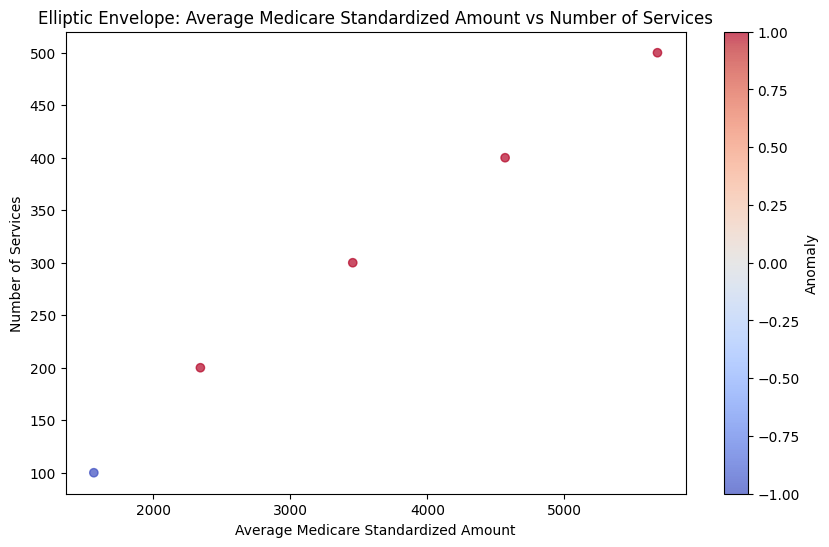

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Example data (replace with your actual data)
data = {
    'Average Medicare Standardized Amount': ['1,568', '2,345', '3,456', '4,567', '5,678'],
    'Number of Services': [100, 200, 300, 400, 500]
}

# Create DataFrame
df = pd.DataFrame(data)

# Selecting the relevant columns and dropping missing values
columns_of_interest = ['Average Medicare Standardized Amount', 'Number of Services']
data_elliptic = df[columns_of_interest].dropna()

# Convert 'Average Medicare Standardized Amount' to numeric, handling commas
data_elliptic['Average Medicare Standardized Amount'] = data_elliptic['Average Medicare Standardized Amount'].str.replace(',', '').astype(float)

# Preparing the data
X_elliptic = data_elliptic.values

# Applying Elliptic Envelope
elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)
data_elliptic['Anomaly'] = elliptic_env.fit_predict(X_elliptic)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for Elliptic Envelope anomaly detection
plt.scatter(data_elliptic['Average Medicare Standardized Amount'], data_elliptic['Number of Services'], c=data_elliptic['Anomaly'], cmap='coolwarm', alpha=0.7)
plt.title('Elliptic Envelope: Average Medicare Standardized Amount vs Number of Services')
plt.xlabel('Average Medicare Standardized Amount')
plt.ylabel('Number of Services')
plt.colorbar(label='Anomaly')
plt.show()




* This is the plot between between Average Medicare Standardized Amount and Number of Services
* The majority (blue points) of data points are densely packed and spread across the entire range of the x-axis (Average Medicare Standardized Amount).


*  The red data points are more sparsely scattered throughout the plot.






Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


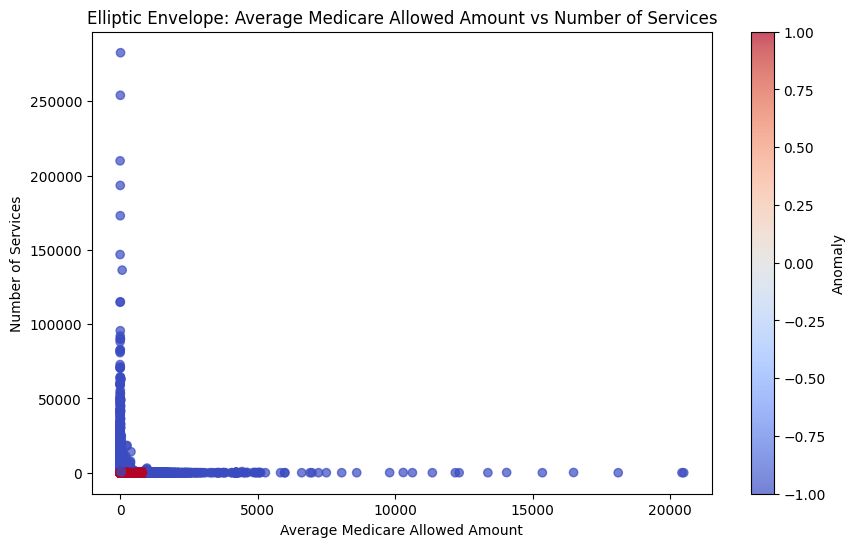

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Load the data
file_path = '/content/Healthcare Providers.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Print the available columns to verify the correct column name
print(df.columns)

# Select the two numerical columns, correcting any potential typos
numerical_columns = ['Average Medicare Allowed Amount', 'Number of Services']  # Verify column names
data = df[numerical_columns]

# Remove commas and convert to numeric
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle any missing values by dropping them
data = data.dropna()

# Preparing the data
X_elliptic = data.values

# Applying Elliptic Envelope
elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)
data['Anomaly'] = elliptic_env.fit_predict(X_elliptic)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for Elliptic Envelope anomaly detection
plt.scatter(data['Average Medicare Allowed Amount'], data['Number of Services'], c=data['Anomaly'], cmap='coolwarm', alpha=0.7)  # Use corrected column name
plt.title('Elliptic Envelope: Average Medicare Allowed Amount vs Number of Services')  # Use corrected column name
plt.xlabel('Average Medicare Allowed Amount')  # Use corrected column name
plt.ylabel('Number of Services')
plt.colorbar(label='Anomaly')
plt.show()




*  THis is the plot between Average Medicare Allowed Amount and Number of Services
*   The majority (blue points)of data points are densely packed and spread across the entire range of the x-axis (Average Medicare Allowed Amount)


*  The red data points are more sparsely scattered throughout the plot.
They deviate significantly from the majority and are considered potential anomalies or outliers.






## performing one class SVM

In [ ]:


import pandas as pd
# Load the dataset (replace '/content/@1.csv' with your actual file path)
data = pd.read_csv('/content/@1.csv')

# Select all numerical columns for training
numerical_columns = [
    'Number of Services', 'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
    'z_score', 'Service Utilization Rate', 'Average Cost per Service',
    'Payment to Charge Ratio', 'Total Services'
]

# Extract the numerical data and drop rows with missing values
numerical_data = data[numerical_columns].dropna()

# Normalize the numerical data
scaler = StandardScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Fit the One-Class SVM model
svm_model = OneClassSVM(nu=0.1)  # nu is a hyperparameter to control the number of outliers
svm_model.fit(numerical_data_normalized)


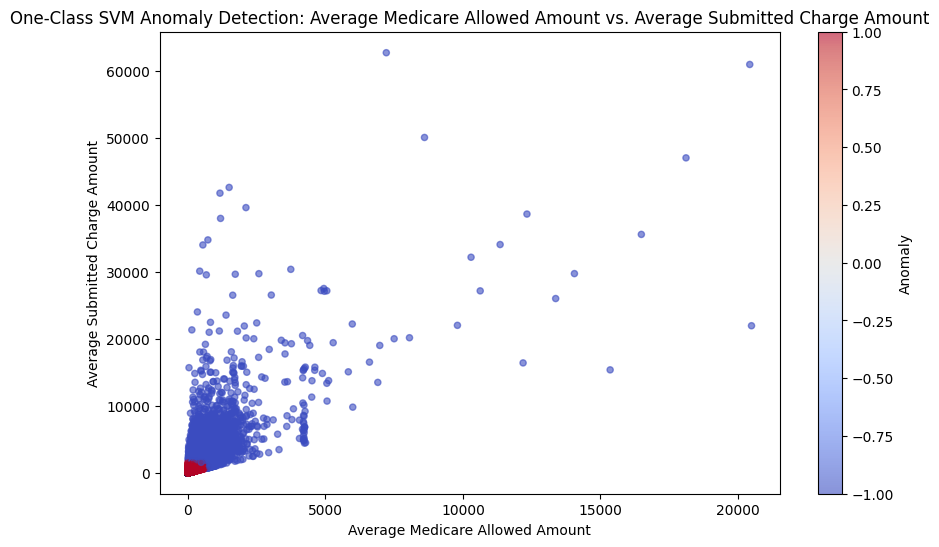

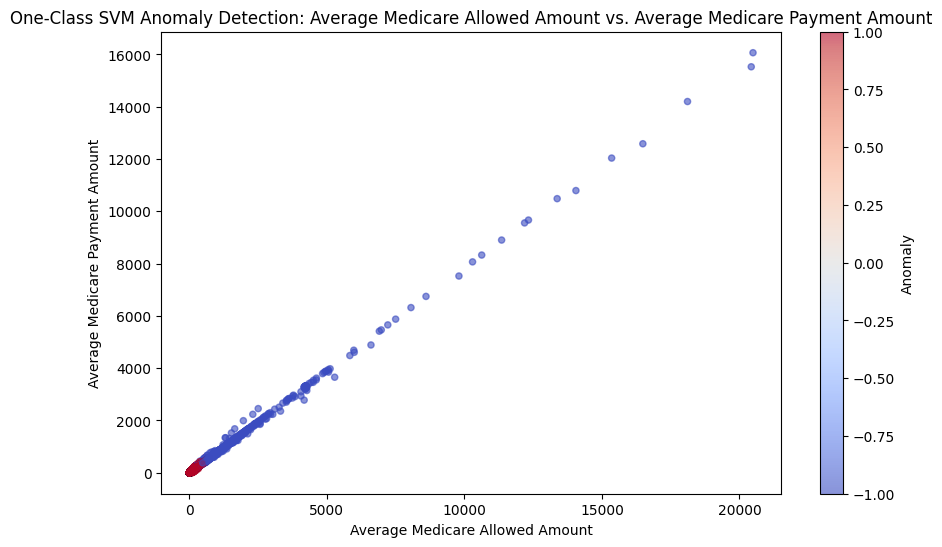

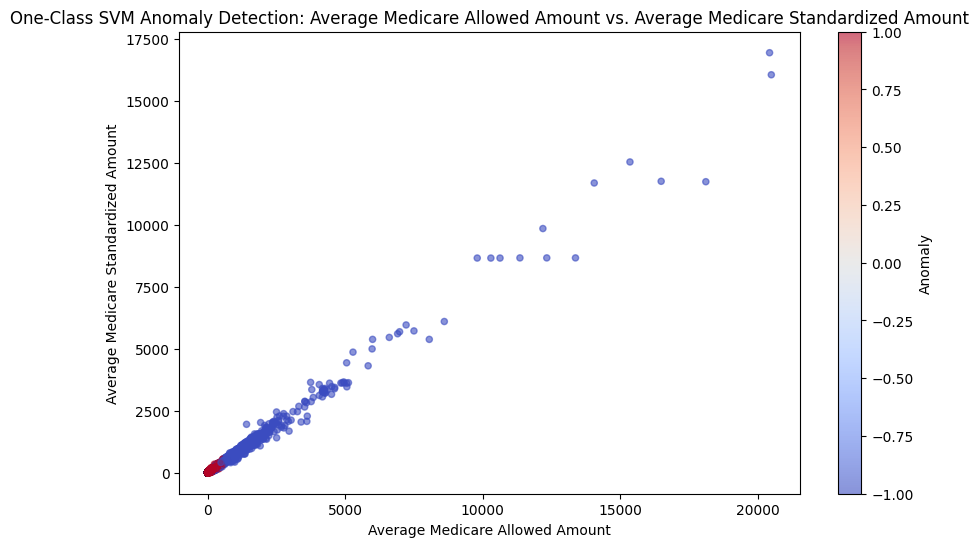

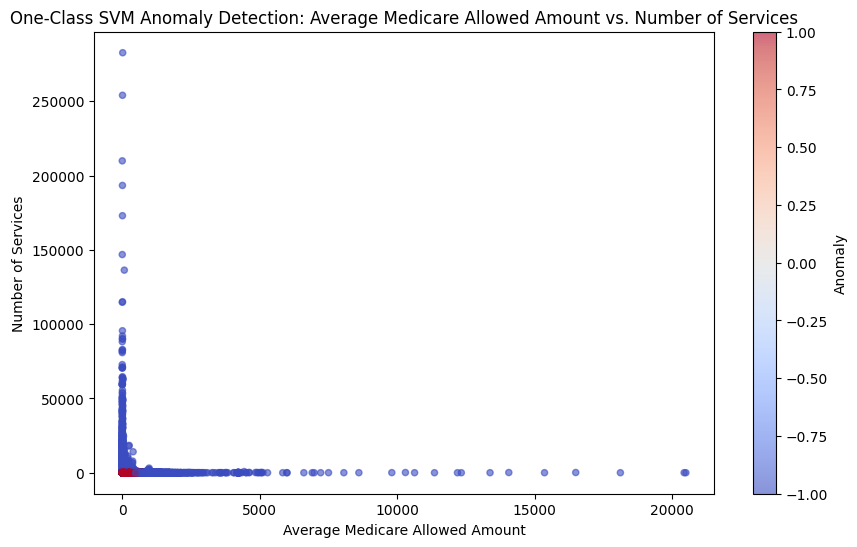

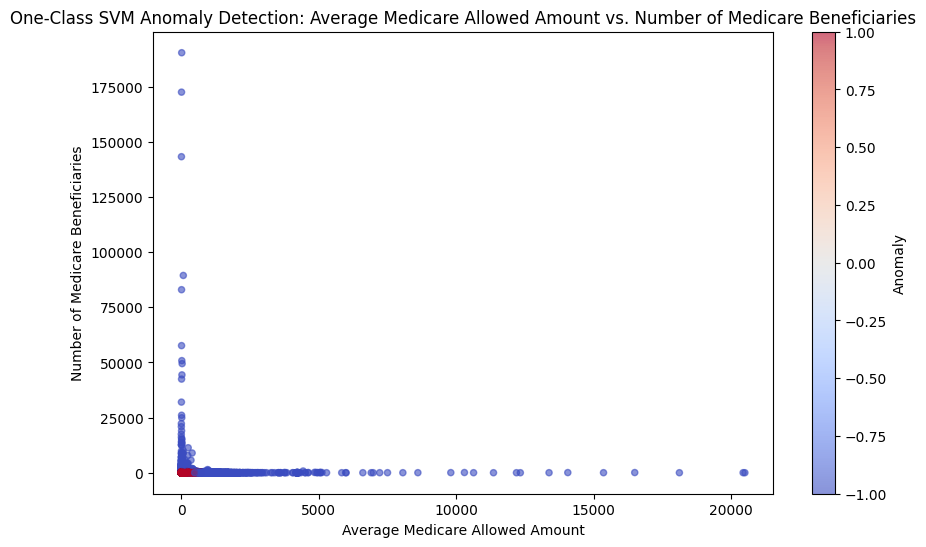

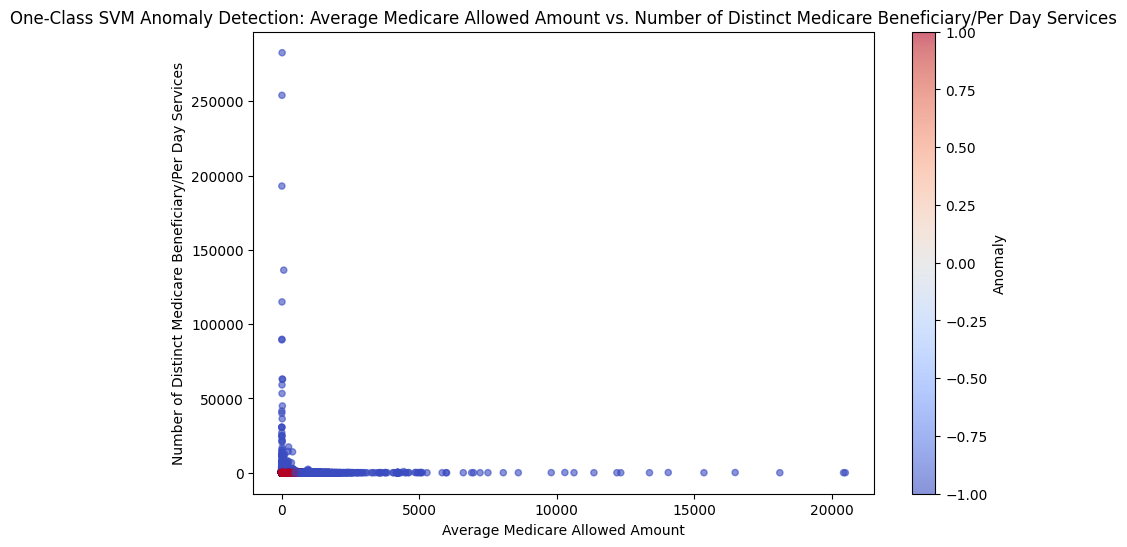

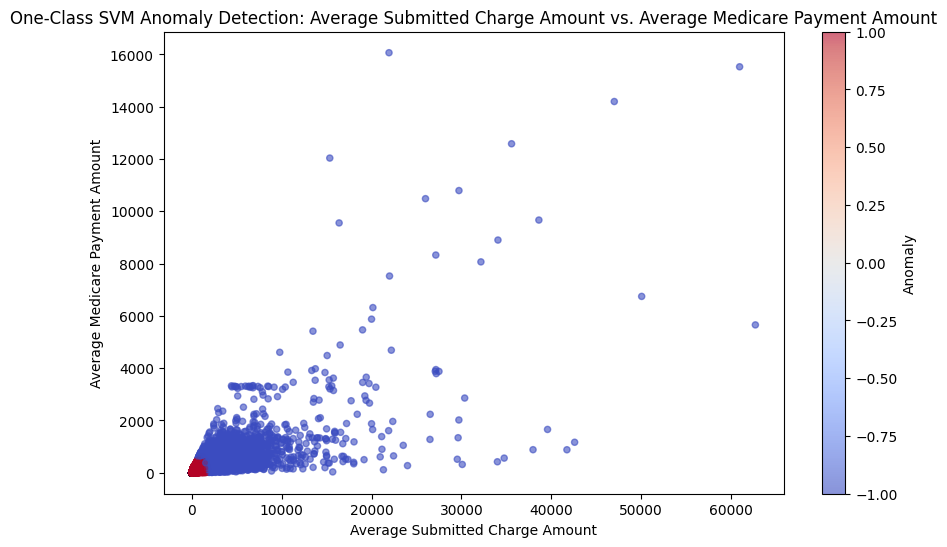

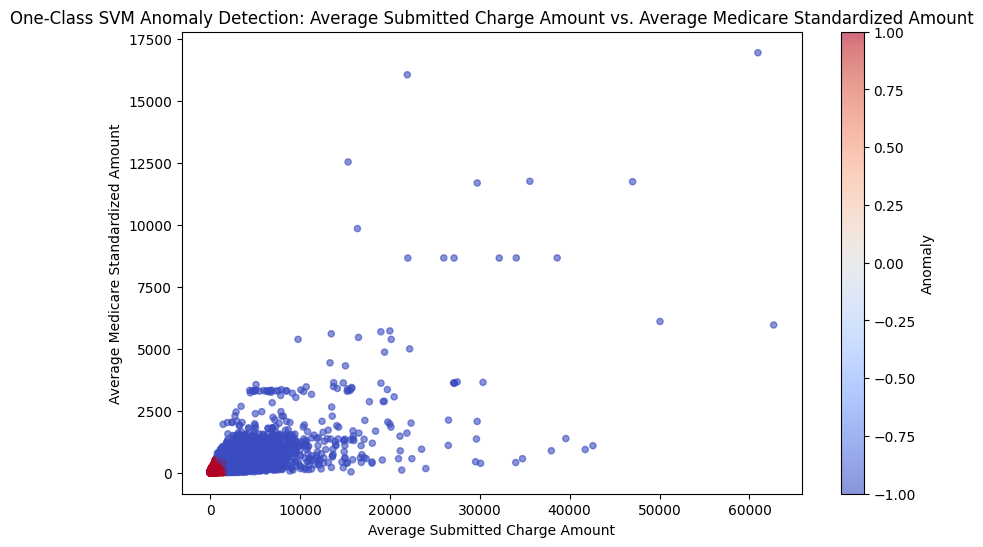

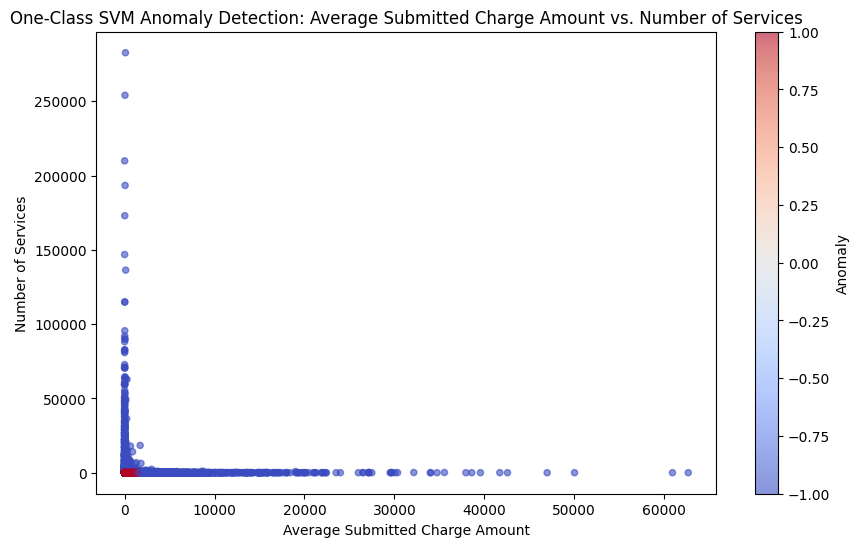

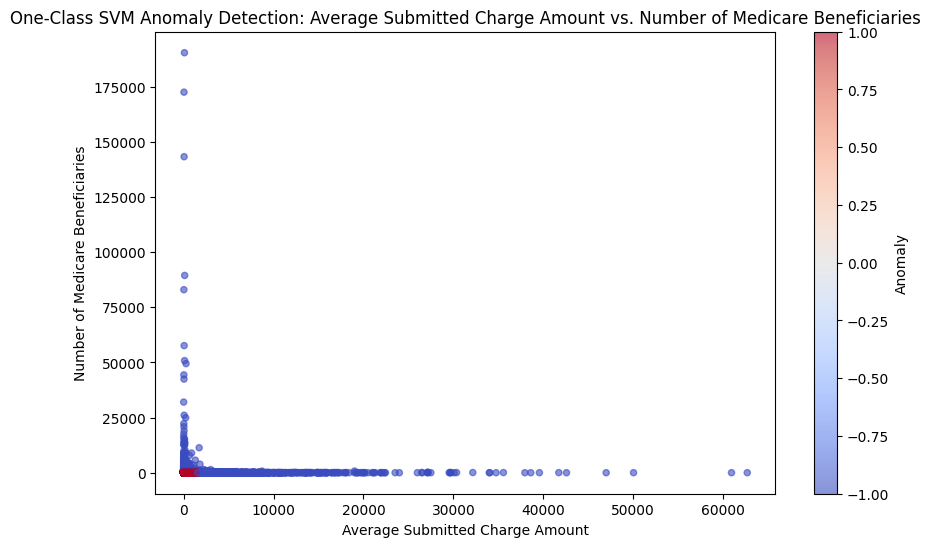

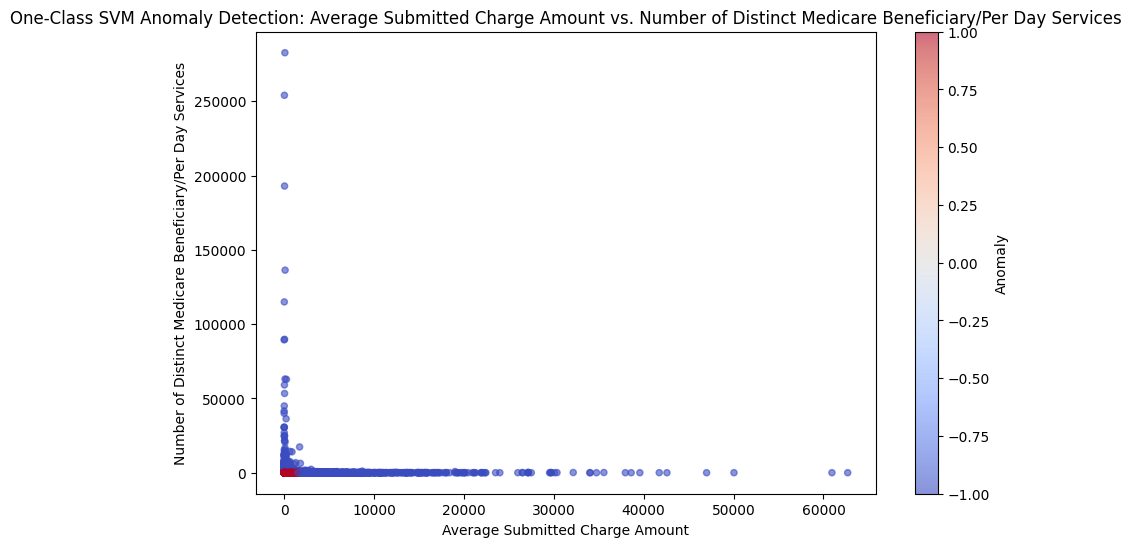

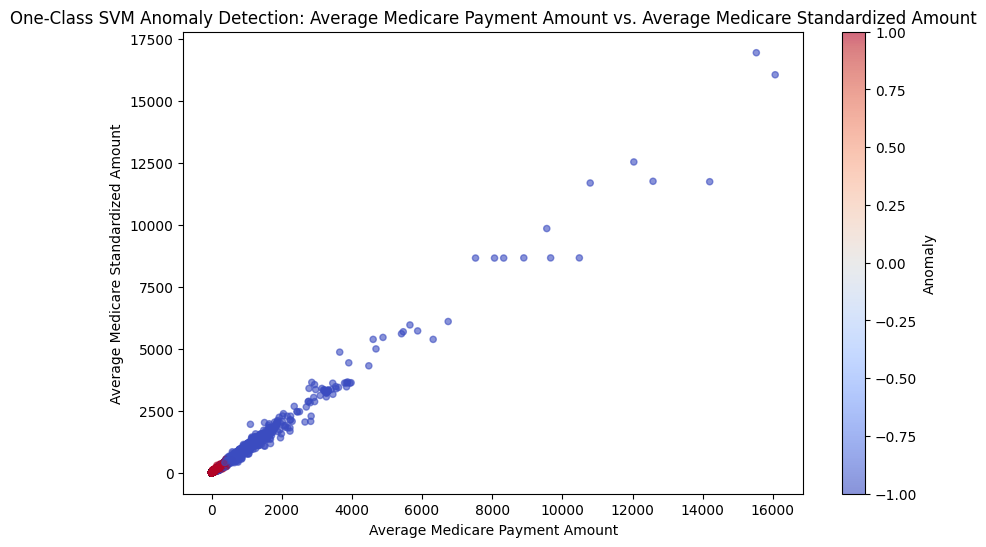

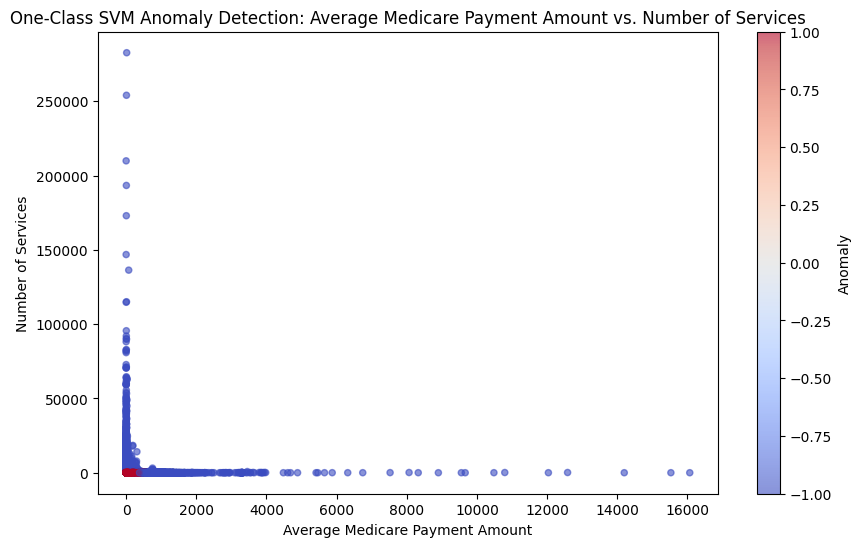

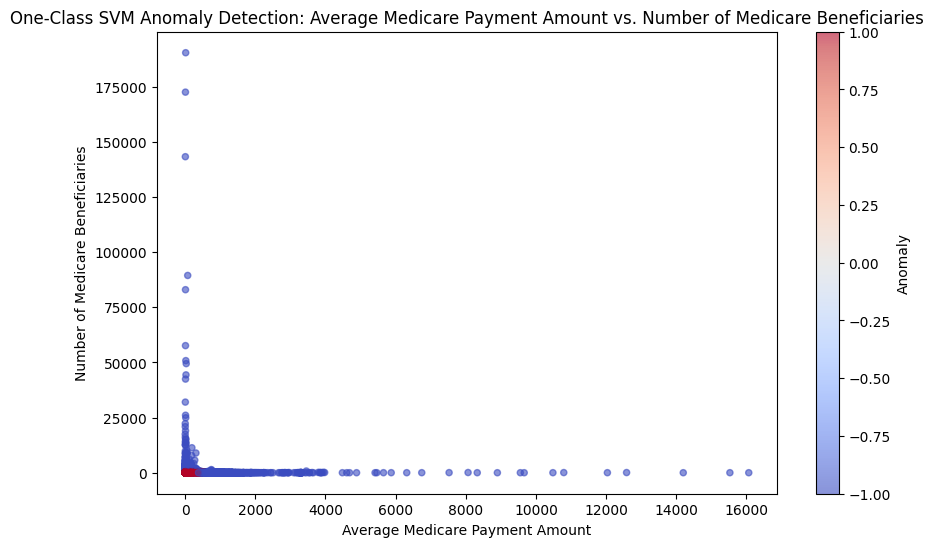

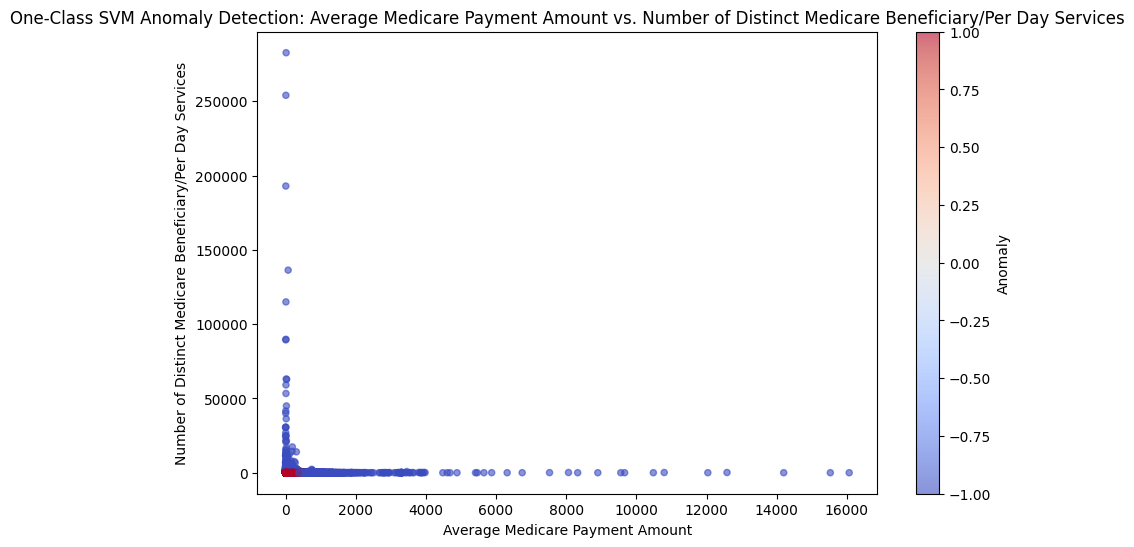

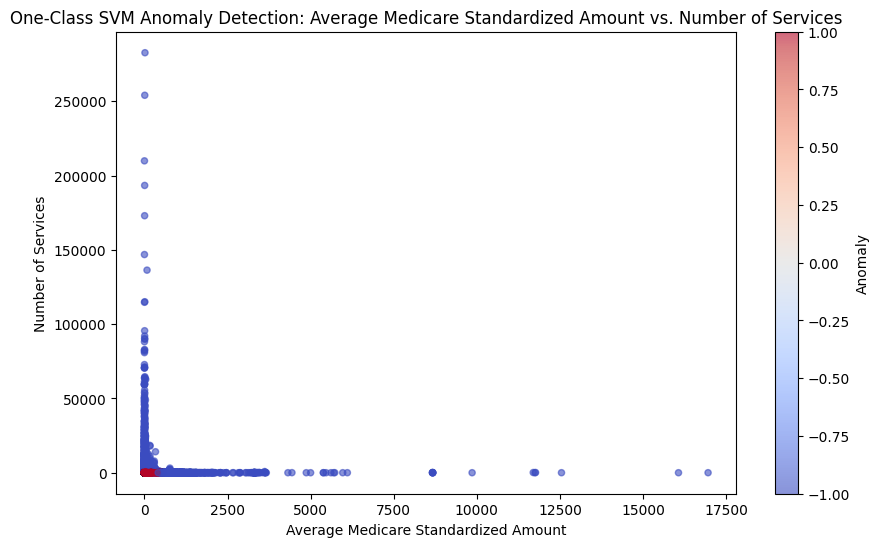

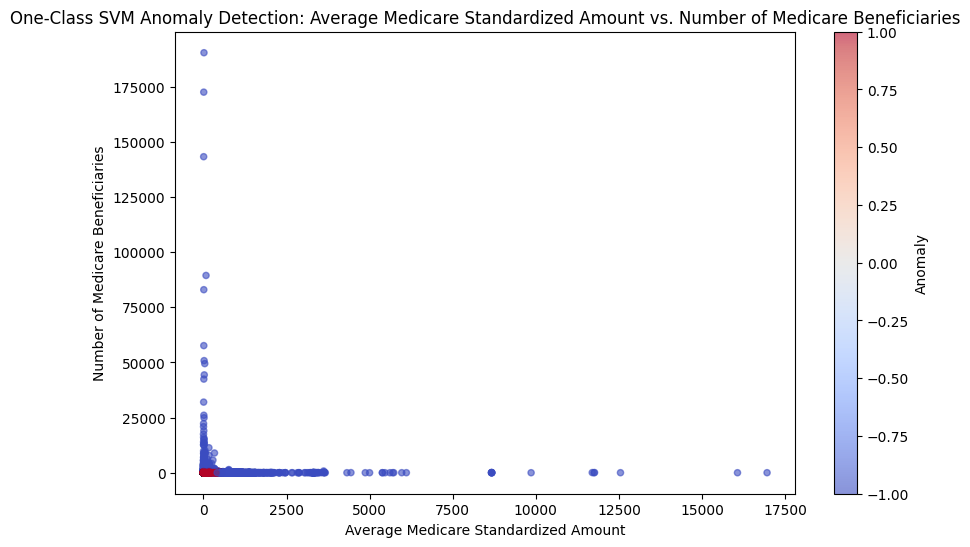

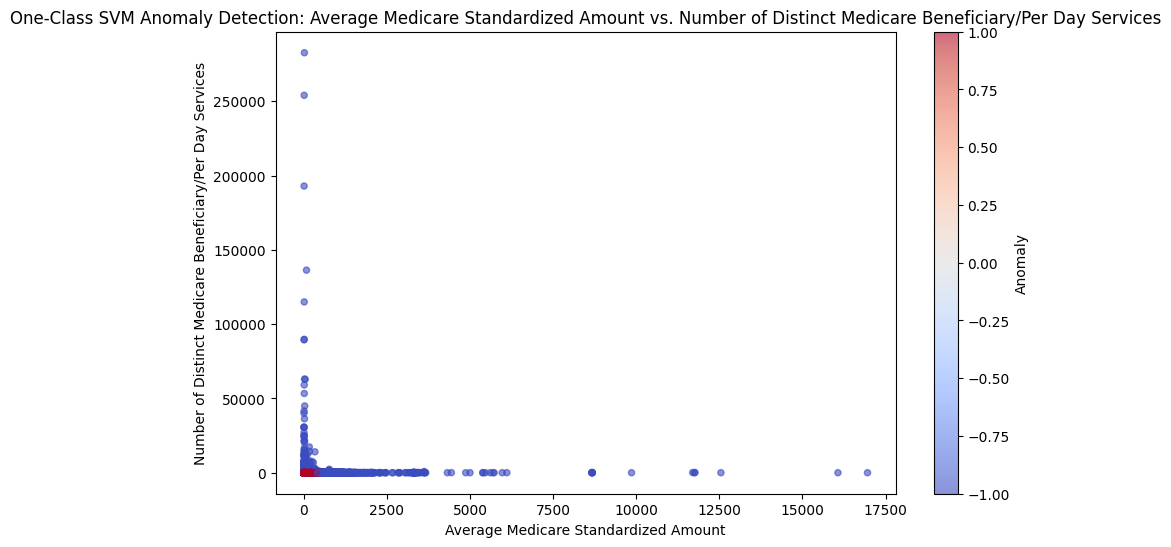

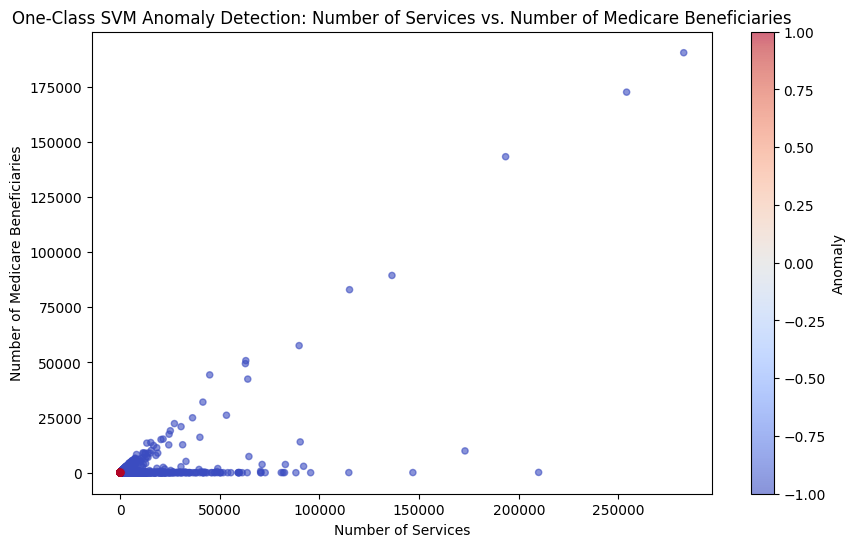

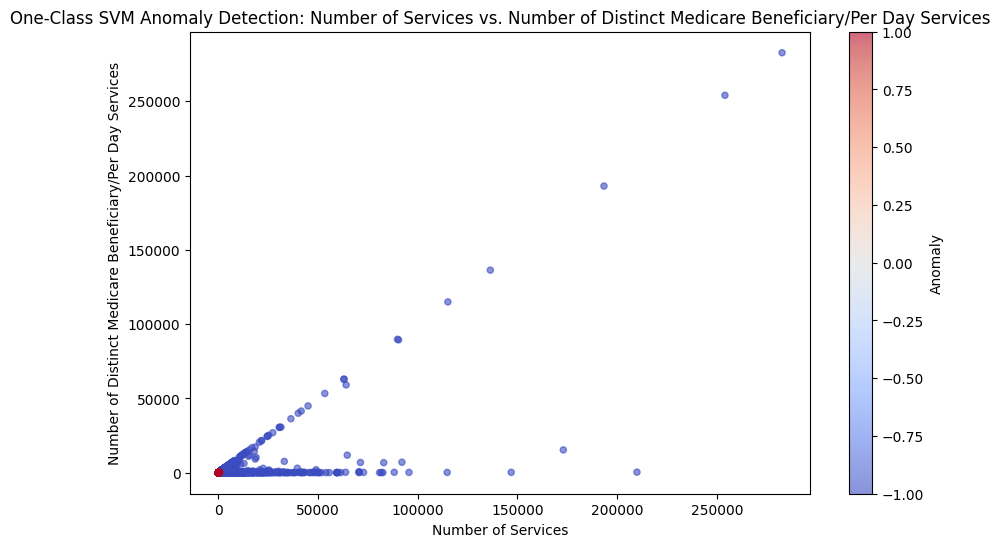

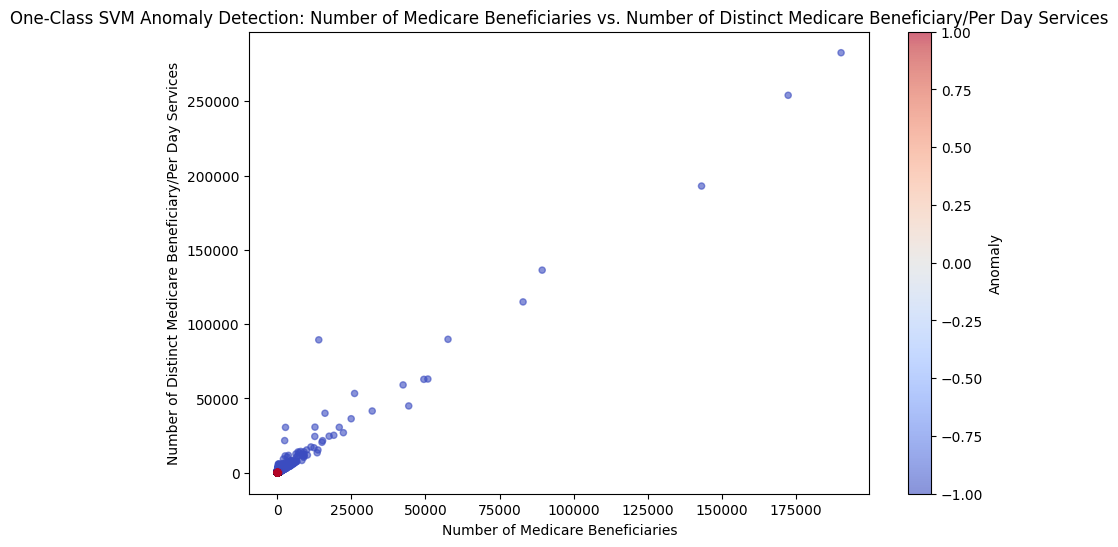

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
# Load the data (replace 'Healthcare Providers.csv' with your actual file path)
df = pd.read_csv('/content/Healthcare Providers.csv', encoding='ascii')

# Select the numerical columns
numerical_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
                    'Number of Services', 'Number of Medicare Beneficiaries',
                    'Number of Distinct Medicare Beneficiary/Per Day Services']
data = df[numerical_columns]

# Remove commas and convert to numeric
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle any missing values by dropping them
data = data.dropna()

# Fit the One-Class SVM model
svm_model = OneClassSVM(nu=0.1)  # Adjust the hyperparameter 'nu' as needed
svm_model.fit(data)

# Predict anomalies (1 for normal, -1 for anomalies)
anomalies = svm_model.predict(data)

# Create a new DataFrame from the preprocessed data and add the anomaly column
df_anomalies = pd.DataFrame(data)
df_anomalies['anomaly'] = anomalies

# Create scatter plots for each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df_anomalies[numerical_columns[i]], df_anomalies[numerical_columns[j]],
                    c=df_anomalies['anomaly'], cmap='coolwarm', s=20, alpha=0.6)
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title('One-Class SVM Anomaly Detection: {} vs. {}'.format(numerical_columns[i], numerical_columns[j]))
        plt.colorbar(label='Anomaly')
        plt.show()


## 1.plot


*   This is the plot between Average Submitted Charge Amount and Average Medicare Allowed Amount .
* in which red points indicates the anomaly points and blue points indicates normal points


*   In the above plot we can see that there are less anomaly points compared to normal points.






##2.plot


*   this is plot between Average medicare payment amount vs average medicare allowed amount.
*  we can see very less anomaly points near the origin the graph is increasing linearly



## 3.plot


*  this is plot between Average medicare standardized  amount vs average medicare allowed amount.

*   we can see in which red points indicates the anomaly points and blue points indicates normal points
In the above plot we can see that there are less anomaly points compared to normal points.



# 4.plot


*  this is the plot between number of services vs Average medicare allowed amount.

* we can see that this is an L-shaped graphs with blue points as normal points and red points as anomaly points.
* more anomaly points are stagnated near the origin or corner point.




# plot (Number of Distinct Medicare Beneficiary/Per Day Services vs Number of Services)


* This plot indicates the anomalies in red points which are very in low number where blue points indicates the normal points .


* where the anomaly points are stagnated near the bottom of the plot and in very less quantity.








